In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#Import dataset
data = pd.read_csv('/content/Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
#Read first 5 rows of the data
print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
#Finding the datatypes of each variable
print(data.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In this original dataset only "SeniorCitizen", "tenure" and "MonthlyCharges" are numerical values. All the others are categorical values. So now we take few important variables and do visualisation as necessary.

<ipython-input-5-2a20c08624e7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, palette='viridis')
<ipython-input-5-2a20c08624e7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, palette='viridis')
<ipython-input-5-2a20c08624e7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataframe, palette='viridis')
<ipython-input-5-2a20c08624e7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

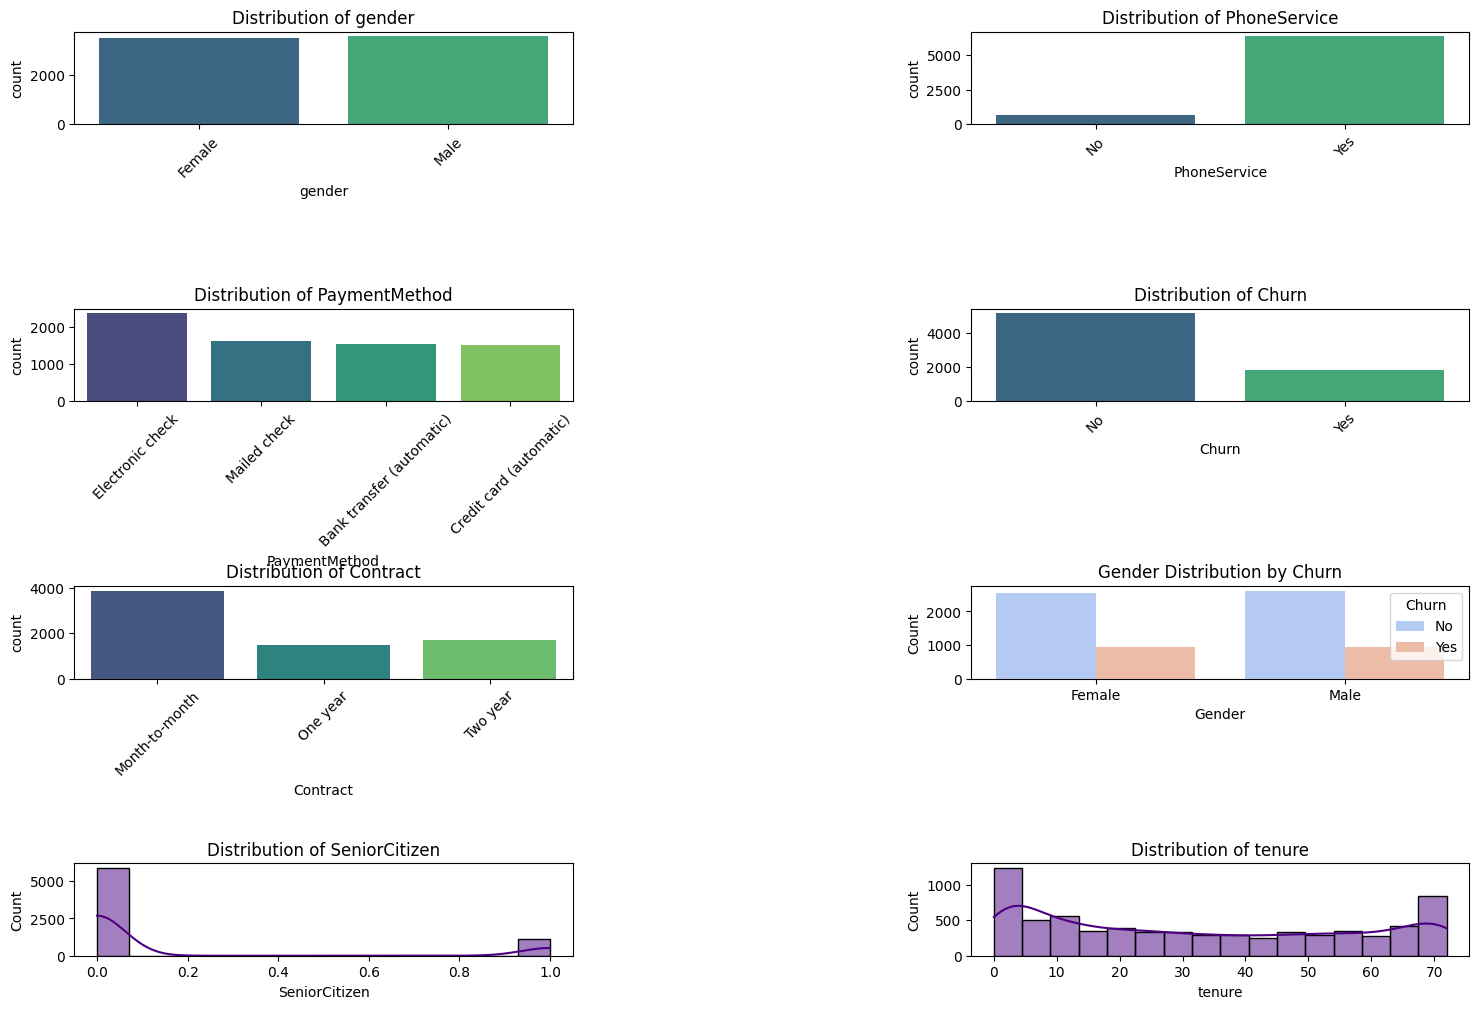

In [5]:
#Select the relevant columns
selected_columns = ['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'PaymentMethod', 'Churn', 'Contract']
dataframe = data[selected_columns]

#Create a figure for subplots with a smaller size
plt.figure(figsize=(18, 12))

#Get all categorical columns
categorical_columns = dataframe.select_dtypes(include='object').columns

#Calculate the total number of subplots needed
num_categorical_plots = len(categorical_columns)
num_numerical_plots = len(dataframe.select_dtypes(include=['float64', 'int64']).columns)
total_subplots = num_categorical_plots + num_numerical_plots

#Add 1 to total_subplots for the Gender vs. Churn plot
total_subplots += 1

#Calculate the number of rows needed
num_rows = (total_subplots + 1) // 2

#Plot distribution for categorical variables
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(x=col, data=dataframe, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

#Add the Gender vs. Churn plot
plt.subplot(num_rows, 2, num_categorical_plots + 1)
sns.countplot(x='gender', hue='Churn', data=dataframe, palette='coolwarm')
plt.title('Gender Distribution by Churn')
plt.xlabel('Gender')
plt.ylabel('Count')

#Plot distribution for numerical variables
numerical_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i + num_categorical_plots + 1)
    sns.histplot(dataframe[col], kde=True, color='indigo')
    plt.title(f'Distribution of {col}')

#Adjust spacing between subplots
plt.subplots_adjust(hspace=2, wspace=0.8)  # Increased spacing

#Show the plot
plt.show()


From the visualisation we can understand that the number of males are slightly higher than the number of females. Most people have Phone service and are most likely to continue with their telecom service. Most of them preferred electronic check as the payment method and month to month contract.

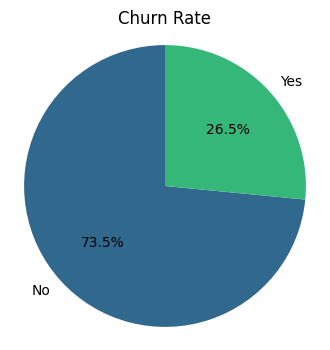

In [6]:
#Calculate churn rate
churn_count = data['Churn'].value_counts()
churn_rate = churn_count / churn_count.sum()

#Get the first two colors from the viridis color palette
colors = sns.color_palette("viridis", 2)

#Plot the churn rate as a pie chart
plt.figure(figsize=(4, 4))
plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Churn Rate')
plt.axis('equal')
plt.show()


As found earlier, 73.5% of customers are supposed to continue with their service whereas the remaining people wish to change them.

In [7]:
#Remove the 'customerID' column
data = data.drop(columns=['customerID'])

#Change total charges into a numerical variable
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

#Change predictor variable into a binary numeric variable
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Find missing values in each column
print(data.isnull().sum())

#Removing missing values
data.dropna(inplace = True)


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<ipython-input-7-7c6ae4916028>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
<ipython-input-7-7c6ae4916028>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Inorder for predicting the churn, the target column "Churn" is converted to a binary numerical value. This can help in model training. All the 11 missing values were removed so that it doesn't affect the model building. The unnecessary columns like "CustomerID" was removed.

In [8]:
#Get the updated dataset
print(data)


      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

This is the updated dataset.

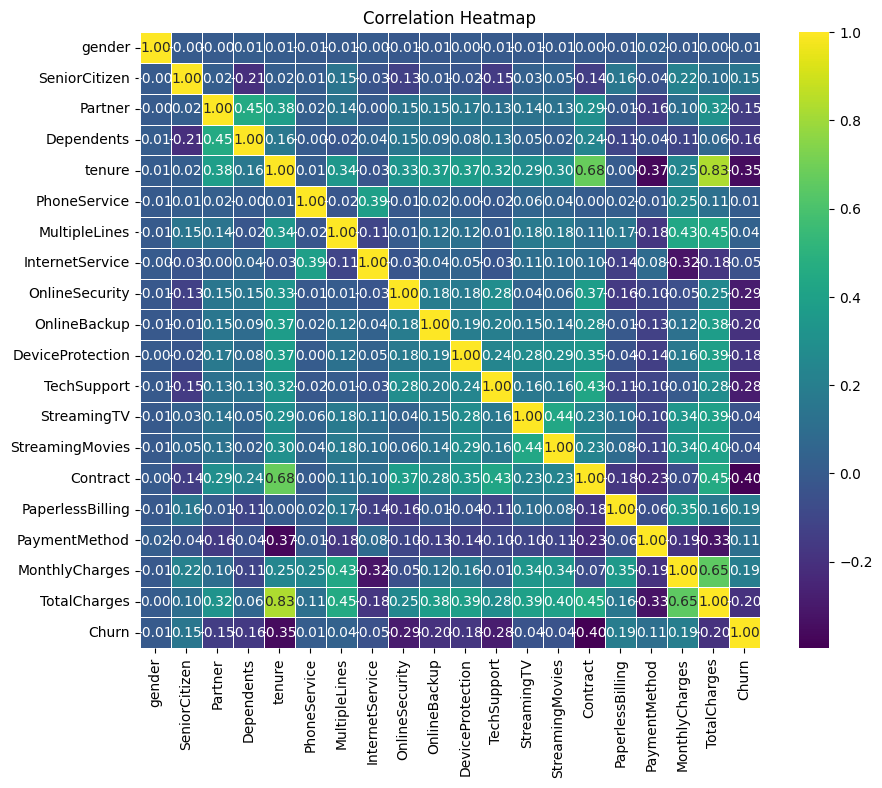

In [9]:
#Applying label encoding to all categorical columns
label_encoder = LabelEncoder()

#Identifying categorical columns (columns with 'object' type)
categorical_columns = data.select_dtypes(include='object').columns

#Applying label encoding to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

#Getting the correlation matrix
correlation_matrix = data.corr()

#Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The categorical columns where converted to numerical values. The above figure shows a correlation heatmap that displays the association between each of the variables. High correlation between features might indicate redundancy. But from the graph, there are no reduntant features.

<ipython-input-10-85a914abfa21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn.values, palette='viridis')


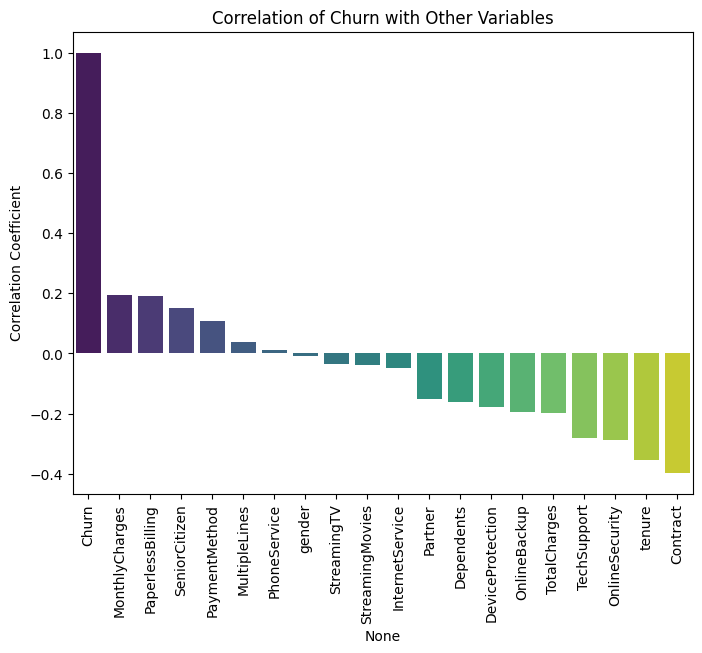

In [10]:
#Calculating the correlation of 'Churn' with all other variables
correlation_with_churn = data.corr()['Churn'].sort_values(ascending=False)

#Plotting the correlation of 'Churn' with other variables
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn.values, palette='viridis')
plt.title('Correlation of Churn with Other Variables')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.show()

In [11]:
#We will use the data frame where we had created dummy variables
y = data['Churn'].values
X = data.drop(columns = ['Churn'])

#Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [12]:
#Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [13]:
random_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

#Initialize models
logistic_model = LogisticRegression(solver='liblinear')
rf_model = RandomForestClassifier(n_estimators=100, random_state=random_state)
svm_model = SVC(random_state=random_state)

#Fitting the models
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

#Predictions
from sklearn import metrics
logistic_pred = logistic_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)


In [14]:
#Print accuracy scores for each model
print(f"Logistic Regression Accuracy: {metrics.accuracy_score(y_test, logistic_pred):.3f}")
print(f"Random Forest Accuracy: {metrics.accuracy_score(y_test, rf_pred):.3f}")
print(f"SVM Accuracy: {metrics.accuracy_score(y_test, svm_pred):.3f}")

#Classification report for each model
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))

#Confusion Matrix for each model
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))


Logistic Regression Accuracy: 0.806
Random Forest Accuracy: 0.783
SVM Accuracy: 0.799

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.55      0.60       464

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.74      1758
weighted avg       0.80      0.81      0.80      1758


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1294
           1       0.61      0.50      0.55       464

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.78      1758


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1294
           1       0.67      0.47     

Each of these models perform well in prediction. But comparatively SVM or support vector machine has the better accuracy. Their confusion matrix also shows that all these models can perform well in identifying both yes and no cases of churn similarly.

<ipython-input-15-f9aad4f99f30>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


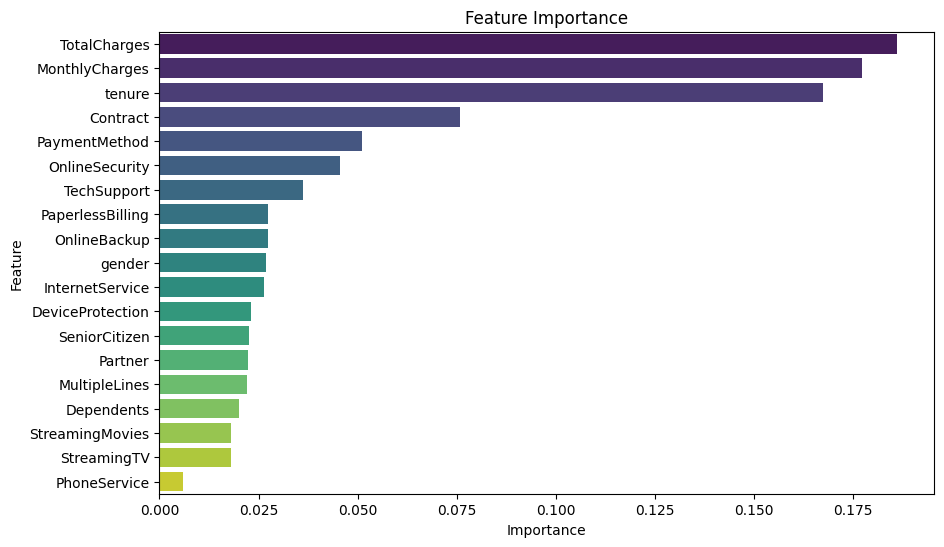

In [15]:
#For Random Forest, we can access feature importances
feature_importance = rf_model.feature_importances_

#Create a DataFrame with feature names and their importance values
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

#Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance")
plt.show()


Using Random forest model, create a graph for feature importance. According to this, Total Charges, Monthly charges and tenure are the most important feature in determining the customer churn.